<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Phase Kickback</h2>

[Watch Lecture](https://youtu.be/7H7A9IRPc8s)

We observe another interesting quantum effect here.

We apply a Controlled-NOT operator, but the controller qubit will be affected!

<h3> Task 1</h3>

Create a quantum circuit with two qubits, say $ q[1] $ and $ q[0] $ in the reading order of Qiskit.

We start in quantum state $ \ket{01} $:
- set the state of $ q[1] $ to $ \ket{0} $, and
- set the state of $ q[0] $ to $ \ket{1} $.

Apply Hadamard to both qubits.

Apply CNOT operator, where the controller qubit is $ q[1] $ and the target qubit is $ q[0] $.

Apply Hadamard to both qubits.

Measure the outcomes.

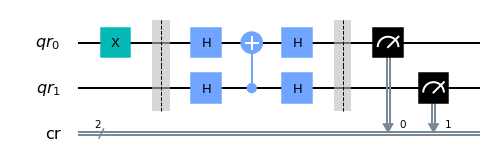

{'11': 100}


In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
#
# your code is here
#

qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')

qc = QuantumCircuit(qr, cr)

qc.x(qr[0])

qc.barrier()

qc.h(qr[0])
qc.h(qr[1])

qc.cx(qr[1], qr[0])

qc.h(qr[0])
qc.h(qr[1])

qc.barrier()
qc.measure(qr, cr)
display(qc.draw(output='mpl'))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

<a href="B52_Phase_Kickback_Solutions.ipynb#task1">click for our solution</a>

<h3> The effect of CNOT </h3>

The quantum state of the up qubit before CNOT:

$$
    \ket{0} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the down qubit before CNOT:

$$
    \ket{1} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the composite system:

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} } 
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT affects when the up qubit has the value 1.

Let's rewrite the composite state as below to explicitly represent the effect of CNOT.

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT flips the state of the down qubit.

After CNOT, we have:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{1} - \frac{1}{\sqrt{2}} \ket{0}  }
$$

Remark that $\ket{0}$ and $ \ket{1} $ are swapped in the second qubit.

If we write the quantum state of the down qubit as before, the sign of $ \ket{1} $ in the up qubit should be flipped.

Thus the last equation can be equivalently written as follows:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     -
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

Before CNOT operator, the sign of $ \ket{1} $ in the up qubit is positive. 
    
After CNOT operator, its sign changes to negative.

This is called <b>phase kickback</b>.

<h3> After CNOT </h3>

It is easy to see from the last expression, that the quantum states of the qubits are separable (no correlation):

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} } 
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

If we apply Hadamard to each qubit, both qubits evolve to state $ \ket{1} $.

The final state is $ \ket{11} $.

<h3> Task 2 </h3>

Create a curcuit with 7 qubits, say $ q[6],\ldots,q[0] $ in the reading order of Qiskit.

Set the states of the top six qubits to $ \ket{0} $.

Set the state of the bottom qubit to $ \ket{1} $.

Apply Hadamard operators to all qubits.

Apply CNOT operator ($q[1]$,$q[0]$) 
<br>
Apply CNOT operator ($q[4]$,$q[0]$) 
<br>
Apply CNOT operator ($q[5]$,$q[0]$) 

Apply Hadamard operators to all qubits.

Measure all qubits. 

For each CNOT operator, is there a phase-kickback effect?

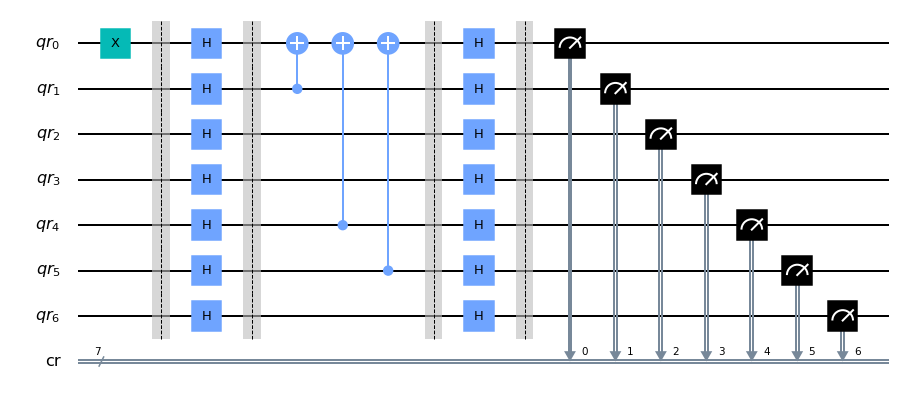

{'0110011': 100}


In [11]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
#
# your code is here
#
qr = QuantumRegister(7, 'qr')
cr = ClassicalRegister(7, 'cr')
qc = QuantumCircuit(qr, cr)

qc.x(qr[0])

qc.barrier()

for i in range(7):
    qc.h(qr[i])

qc.barrier()
    
qc.cx(1, 0)
qc.cx(4, 0)
qc.cx(5, 0)

qc.barrier()

for i in range(7):
    qc.h(qr[i])

qc.barrier()
qc.measure(qr, cr)
display(qc.draw(output='mpl'))

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

<a href="B52_Phase_Kickback_Solutions.ipynb#task2">click for our solution</a>